In [232]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from prophet.diagnostics import cross_validation, performance_metrics

In [233]:
eth_ticker = 'ETH-USD'
eth_data = yf.download(eth_ticker, start=(pd.Timestamp.now() - pd.DateOffset(years=1)).strftime('%Y-%m-%d'), end=pd.Timestamp.now().strftime('%Y-%m-%d'))



[*********************100%%**********************]  1 of 1 completed


In [234]:
eth_data.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2023-07-19,1897.797241,1919.264404,1883.067139,1889.007935,1889.007935,6018487800
2023-07-20,1889.073730,1919.264404,1879.734375,1890.969116,1890.969116,7366830684
2023-07-21,1891.581299,1905.386230,1885.296265,1892.080078,1892.080078,4668158260
2023-07-22,1891.955078,1897.088013,1855.092773,1864.912354,1864.912354,4101305643
2023-07-23,1866.094238,1904.483276,1859.568848,1889.191650,1889.191650,4480604100


In [235]:
eth_data.reset_index(inplace=True)

In [236]:
df = eth_data[['Date', 'Close']]
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)   

C:\Users\Krishna\AppData\Local\Temp\ipykernel_14168\1415304048.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [237]:
df.head()

,ds,y
0,2023-07-19,1889.007935
1,2023-07-20,1890.969116
2,2023-07-21,1892.080078
3,2023-07-22,1864.912354
4,2023-07-23,1889.191650


<Axes: xlabel='ds'>

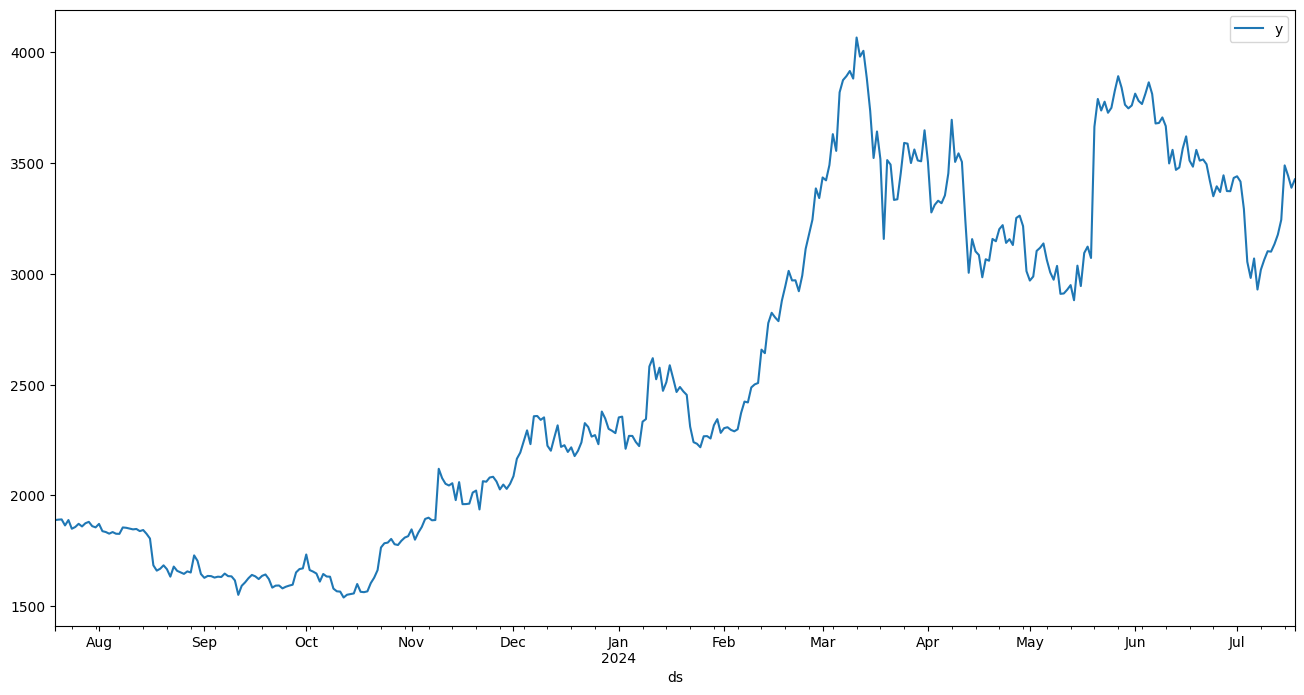

In [238]:
df.plot(x='ds', y='y', figsize=(16,8))

In [239]:

result = adfuller(df['y'])

test_statistic = result[0]
p_value = result[1]

if p_value < 0.05:
    print("The data is stationary and not seasonal.")
else:
    print("The data is non-stationary and may be seasonal.")

The data is non-stationary and may be seasonal.


In [240]:
m = Prophet()
# m.add_country_holidays(country_name='US')
m.fit(df)

16:29:06 - cmdstanpy - INFO - Chain [1] start processing
16:29:06 - cmdstanpy - INFO - Chain [1] done processing


In [241]:
make_future = m.make_future_dataframe(periods=180)
make_future.tail()

,ds
541,2025-01-10
542,2025-01-11
543,2025-01-12
544,2025-01-13
545,2025-01-14


In [242]:
prediction = m.predict(make_future)

In [243]:
prediction.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2023-07-19,1798.686248,1517.348610,2102.248142,1798.686248,1798.686248,10.632237,10.632237,10.632237,10.632237,10.632237,10.632237,0.0,0.0,0.0,1809.318485
1,2023-07-20,1796.520092,1518.300176,2071.127023,1796.520092,1796.520092,3.856702,3.856702,3.856702,3.856702,3.856702,3.856702,0.0,0.0,0.0,1800.376794
2,2023-07-21,1794.353936,1492.504679,2062.327486,1794.353936,1794.353936,-13.834656,-13.834656,-13.834656,-13.834656,-13.834656,-13.834656,0.0,0.0,0.0,1780.519280
3,2023-07-22,1792.187780,1484.386435,2066.432439,1792.187780,1792.187780,-13.440457,-13.440457,-13.440457,-13.440457,-13.440457,-13.440457,0.0,0.0,0.0,1778.747323
4,2023-07-23,1790.021623,1494.299870,2080.237719,1790.021623,1790.021623,-1.514183,-1.514183,-1.514183,-1.514183,-1.514183,-1.514183,0.0,0.0,0.0,1788.507440


c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:72: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()
c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:73: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  ax.plot(m.history['ds'].dt.to_pydatetime(), m.history['y'], 'k.',


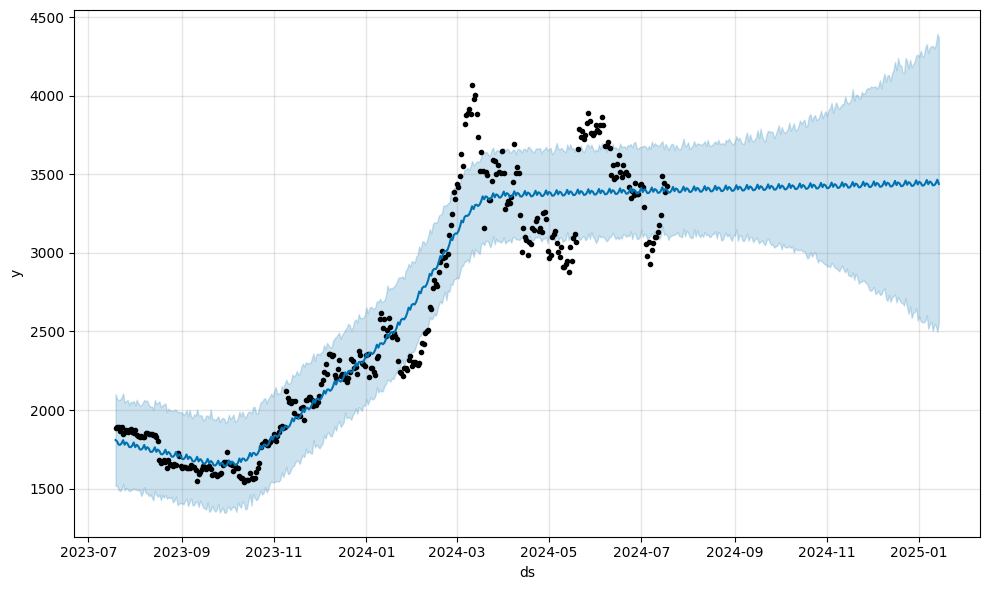

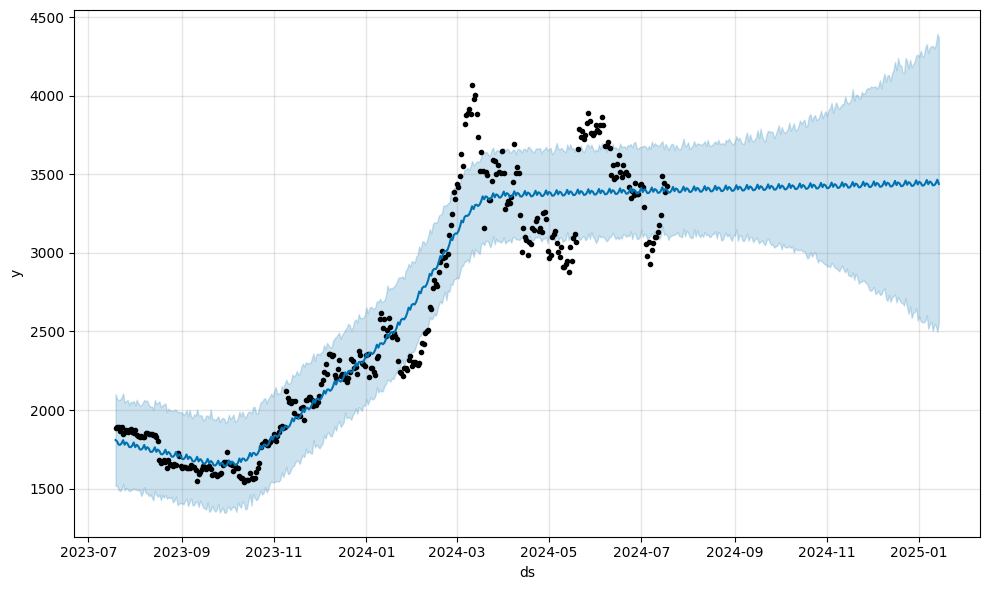

In [244]:
m.plot(prediction)

c:\Users\Krishna\AppData\Local\Programs\Python\Python312\Lib\site-packages\prophet\plot.py:228: FutureWarning: The behavior of DatetimeProperties.to_pydatetime is deprecated, in a future version this will return a Series containing python datetime objects instead of an ndarray. To retain the old behavior, call `np.array` on the result
  fcst_t = fcst['ds'].dt.to_pydatetime()


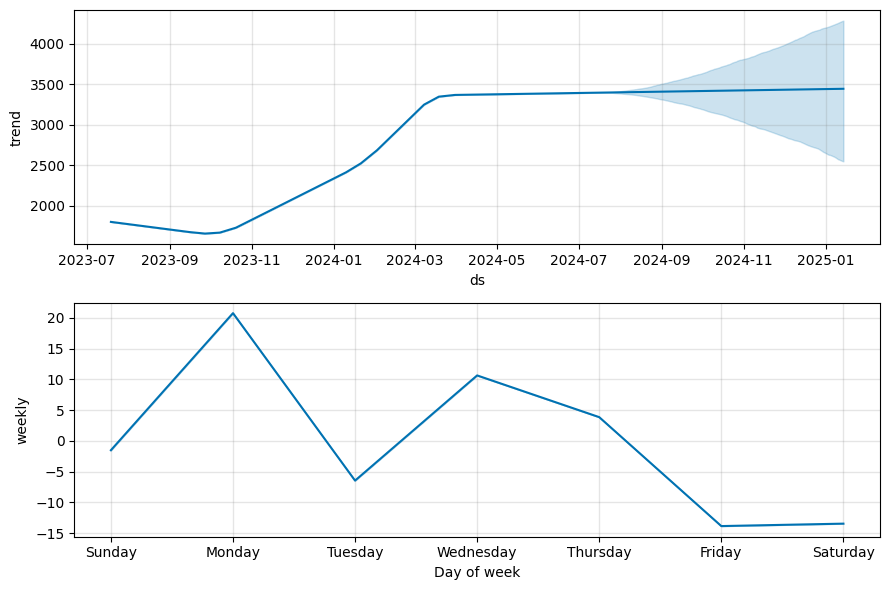

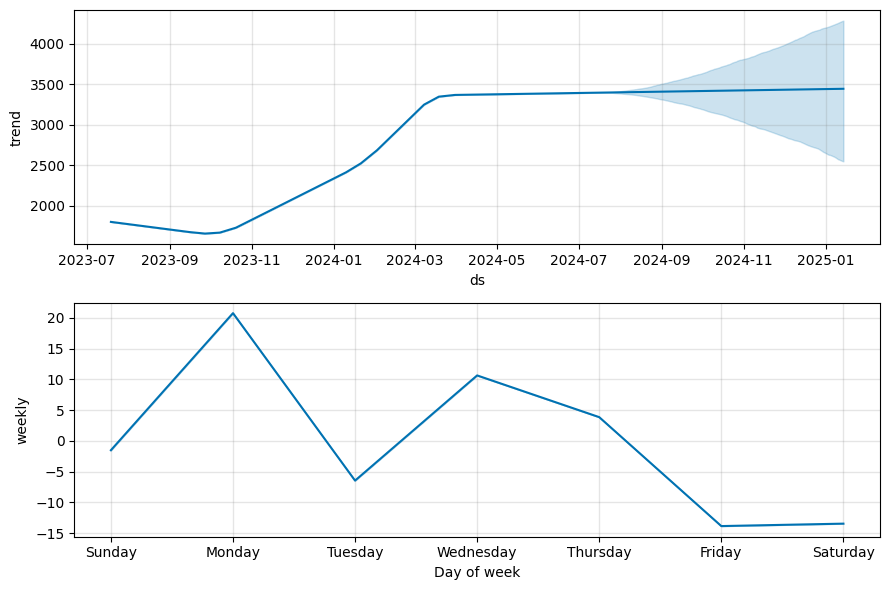

In [245]:
m.plot_components(prediction)

In [246]:
df_cv = cross_validation(m, initial='90 days', period='180 days', horizon='180 days')

  0%|          | 0/1 [00:00<?, ?it/s]16:29:07 - cmdstanpy - INFO - Chain [1] start processing
16:29:07 - cmdstanpy - INFO - Chain [1] done processing
100%|██████████| 1/1 [00:00<00:00,  6.54it/s]


In [247]:
df_cv

,ds,yhat,yhat_lower,yhat_upper,y,cutoff
0,2024-01-21,2496.758484,2418.971547,2587.485400,2453.913086,2024-01-20
1,2024-01-22,2503.520942,2421.088574,2591.272374,2310.826416,2024-01-20
2,2024-01-23,2506.767431,2421.674946,2587.836854,2240.686035,2024-01-20
3,2024-01-24,2524.343039,2438.594469,2610.374039,2233.561768,2024-01-20
4,2024-01-25,2532.570440,2449.335806,2614.767651,2217.710205,2024-01-20
...,...,...,...,...,...,...
175,2024-07-14,3699.614181,2959.046333,4440.664165,3244.079102,2024-01-20
176,2024-07-15,3706.376639,2955.166361,4437.324421,3489.552734,2024-01-20
177,2024-07-16,3709.623128,2932.948122,4459.345433,3443.513428,2024-01-20
178,2024-07-17,3727.198736,2939.478312,4447.502018,3388.752441,2024-01-20


In [248]:
df_p = performance_metrics(df_cv)
df_p

,horizon,mse,rmse,mae,mape,mdape,smape,coverage
0,18 days,67694.346580,260.181372,252.630263,0.110250,0.119652,0.104139,0.055556
1,19 days,70016.585877,264.606474,261.855097,0.114076,0.119652,0.107775,0.000000
2,20 days,69099.235921,262.867335,259.127221,0.112650,0.119652,0.106445,0.000000
3,21 days,66193.033405,257.280068,251.898774,0.109073,0.119652,0.103157,0.000000
4,22 days,62486.182092,249.972363,243.162626,0.104799,0.118598,0.099248,0.000000
...,...,...,...,...,...,...,...,...
158,176 days,232962.252231,482.661633,441.290521,0.141374,0.170213,0.130155,0.944444
159,177 days,234385.247453,484.133502,445.209465,0.142467,0.170213,0.131193,0.944444
160,178 days,235636.428113,485.423967,447.784617,0.143141,0.170213,0.131822,0.944444
161,179 days,239149.601389,489.029244,454.003055,0.144959,0.170213,0.133497,0.944444


In [249]:
mean_rmse = df_p['rmse'].mean()
mean_rmse

377.2110623500217